# Chapter 2
## Plotting

Package you have loaded are not shared between notebooks. For each notebook you need to import the libraries again.

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

# The line below one is only needed for this workshop
from done import imdone, quizanswer

In [8]:
# Make figures bigger in presentation
from matplotlib import rcParams
rcParams['figure.dpi'] = 144

# Visualizing data with Seaborn
Visualizing data is an important part of data science. Just one single graph can make a relation clear as day. We will be using the Python package Seaborn which is built upon matplotlib but is much more user-friendly.

We will be focusing on a dataset showing the fuel economy data for 38 models of cars.

First load the data set from the supplied file `mpg.csv`.

In [3]:
mpg = pd.read_csv("data/mpg.csv")

In [4]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


### Meaning of the fields
| Field | Description |
| :---: | :--- |
| manufacturer | manufacturer name |
| model | model name |
| displ | engine displacement, in litres |
| year | year of manufacture |
| cyl | number of cylinders |
| trans | type of transmission |
| drv | the type of drive train, where<br>f = front-wheel drive, r = rear wheel drive, 4 = 4wd |
| cty | city miles per gallon |
| hwy | highway miles per gallon |
| fl | fuel type |
| class | "type" of car |

## Quiz 2.1
What relationship do you expect to see between engine size (displ) and mileage (hwy)?

Put your answers in the chat!

In [7]:
quizanswer(2, 1, "..")

Success


Let's examine this

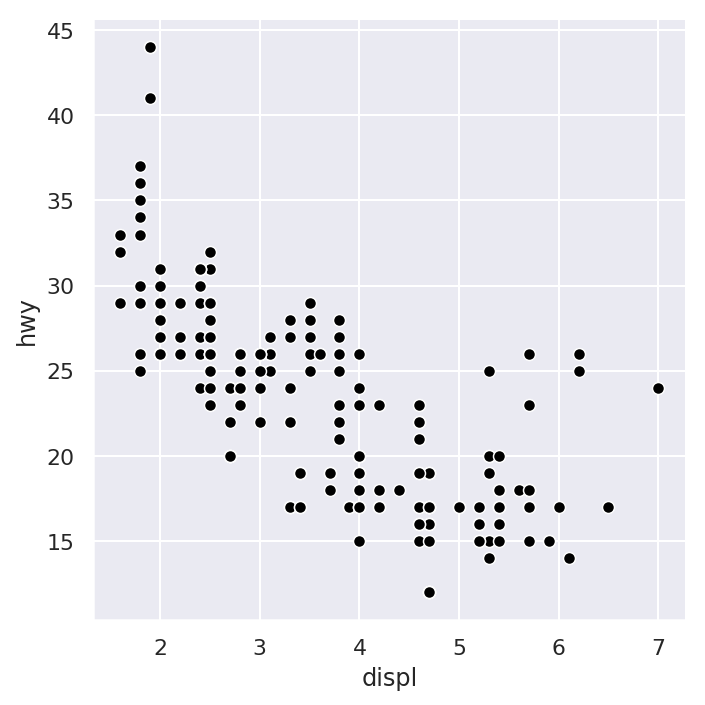

In [5]:
sns.relplot("displ", "hwy", color="black", data=mpg)

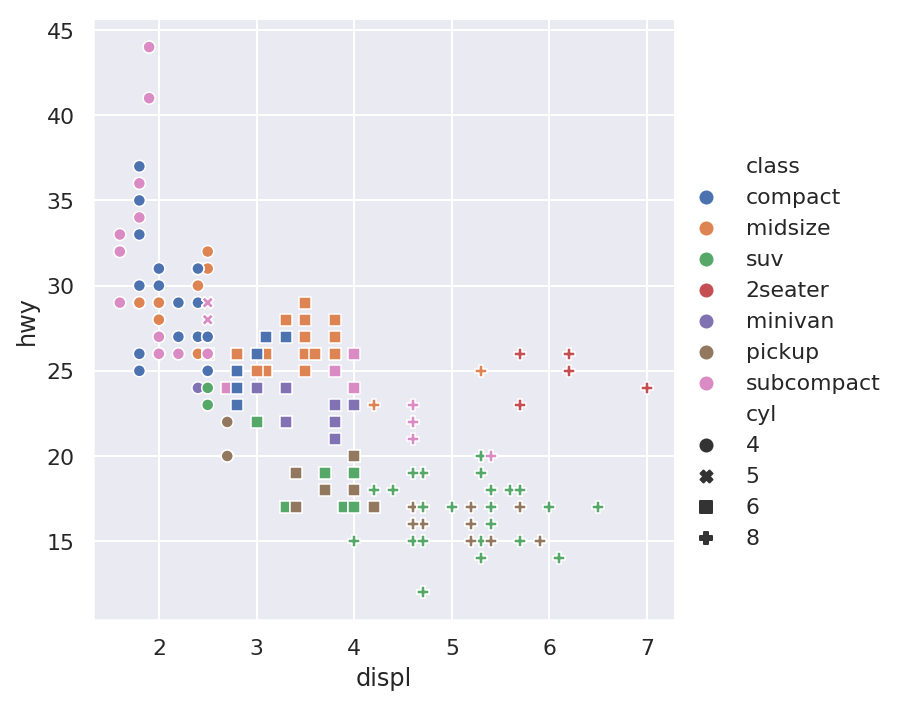

In [4]:
sns.relplot("displ", "hwy", hue="class", style="cyl", data=mpg)

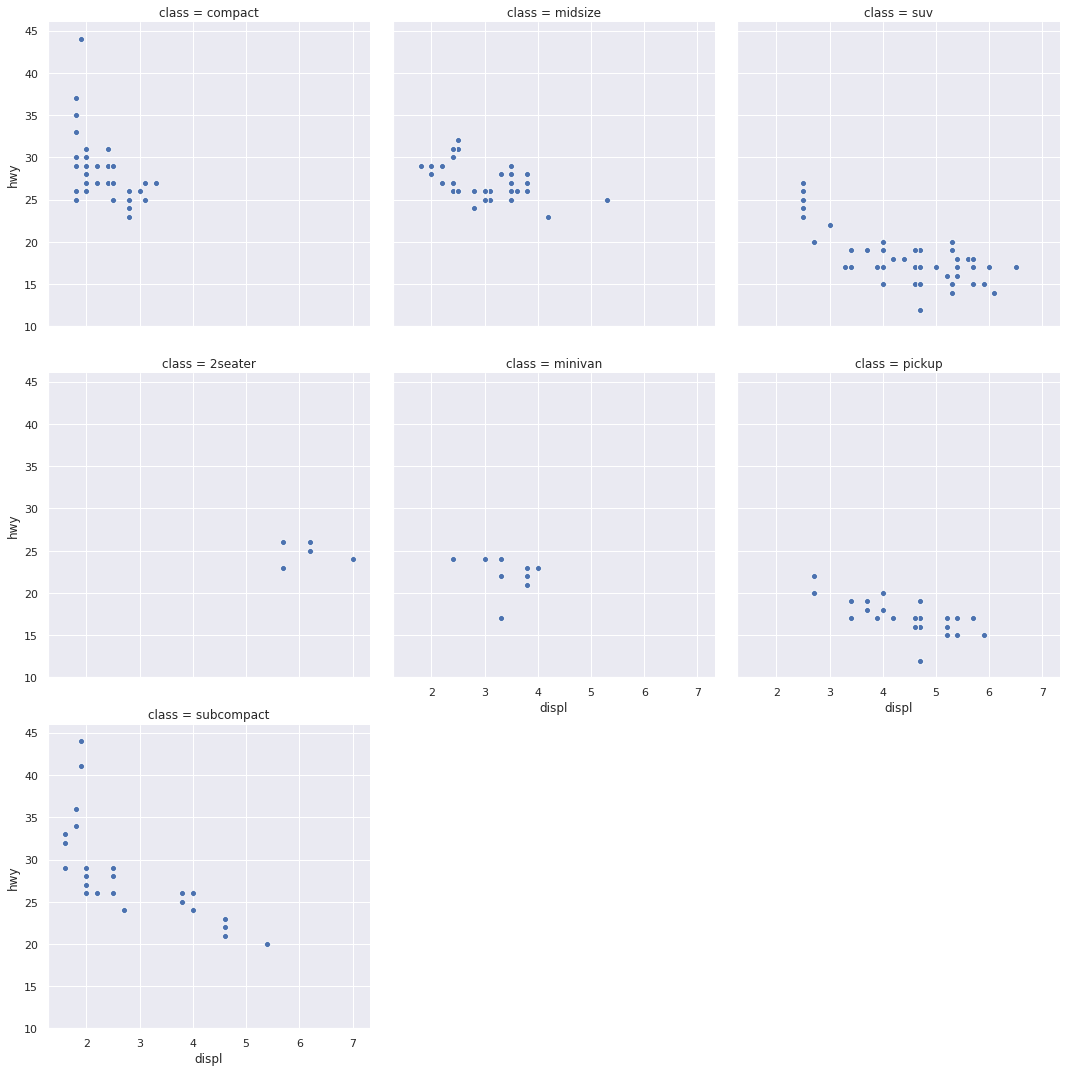

In [16]:
sns.relplot("displ", "hwy", col="class", data=mpg, col_wrap=3)

The same is true for any data you loaded. If you want to reuse data from one notebook in another, you need to export and import you data.

### Exercise 2.1
Load the babynames file again. Replace the `...` below with the correct command. Run the cell with `imdone(2,1)` when you are done.

In [ ]:
babynames = ...

In [4]:
imdone(2,1)

Success


In [2]:
# Solution (HIDEME)
babynames = pd.read_csv("data/ontariobabynames.csv")

As in the previous chapter we can select data by column name.

In [3]:
femalemarys = babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")]

Now plotting can be one by calling the plot function the data frame and specifying which columns needs to be plotted. Here we plot the number of female babies named Mary as a function of time.

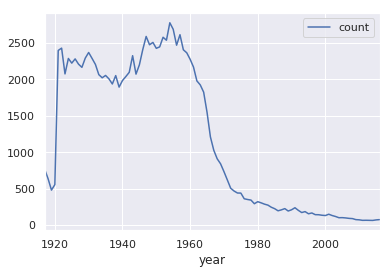

In [4]:
femalemarys.plot("year", "count")

This can also be combined in a single statement

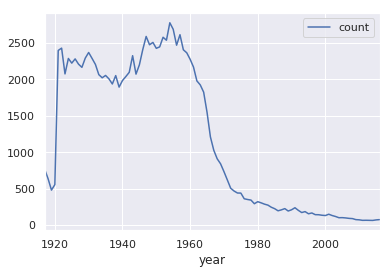

In [5]:
babynames[(babynames["name"] == "Mary") & (babynames["sex"] == "F")].plot("year", "count")

### Exercise 2.2
Plot your own name as a function of time. Fill in the `...` below. If your name is not in the data, you'll be happy to know that you are very unique. However, you'll also get a spectacular error. For the purpose of this exercise, just use any other name.  Run the cell with `imdone(2,2)` when you are done.

In [ ]:
yourname = ...
yourname.plot(...)

In [5]:
imdone(2,2)

Success


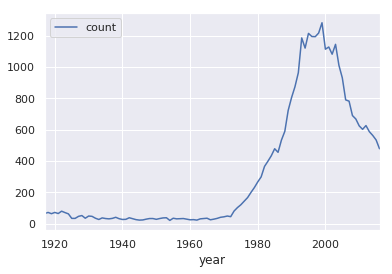

In [6]:
# Solution (HIDEME)
yourname = babynames[(babynames["name"] == "Emily") & (babynames["sex"] == "F")]
yourname.plot("year", "count")

How to plot multiple data sets? Let's get the female babies name Marie too

In [7]:
femalemaries = babynames[(babynames["name"] == "Marie") & (babynames["sex"] == "F")]

Trying to plot both doesn't quite work

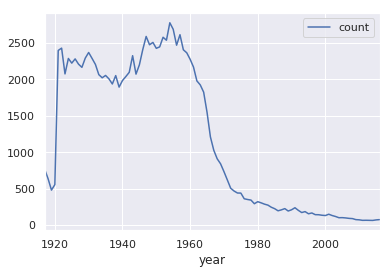

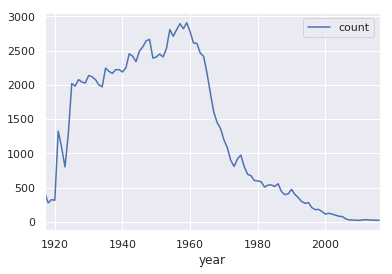

In [8]:
femalemarys.plot("year", "count")
femalemaries.plot("year", "count")

We will need to use matplotlib more directly instead of the quick plot helper function in pandas.

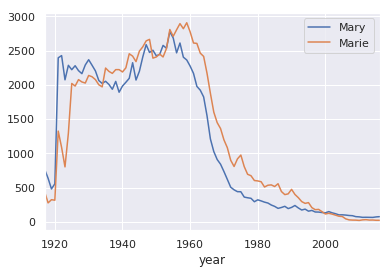

In [9]:
p, ax = plt.subplots()
femalemarys.plot("year", "count", ax=ax, label="Mary")
femalemaries.plot("year", "count", ax=ax, label="Marie")

Terminology is important. The following image shows what relates to what:

<img src="https://matplotlib.org/3.2.0/_images/anatomy.png" alt="Plot anatomy" width="600" style="display: inline-block;"/>

Note that axes refers to the whole frame in which the lines are plotted. A figure can contain multiple axes, i.e. subplots.

### Plot types
There are many different plot types available. A full list can be seen in the Pandas documentation for [plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


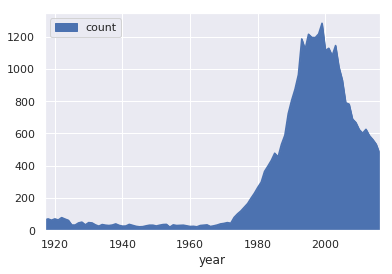

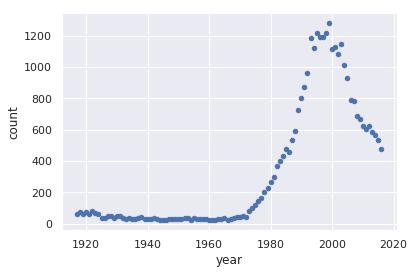

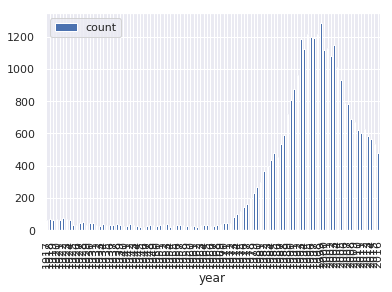

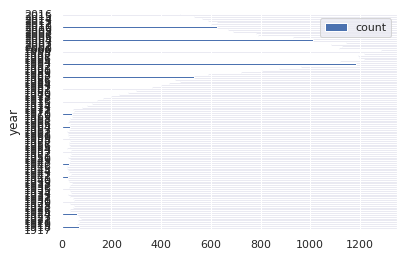

In [10]:
yourname.plot("year", "count", kind="area")
yourname.plot("year", "count", kind="scatter")
yourname.plot("year", "count", kind="bar")
yourname.plot("year", "count", kind="barh")

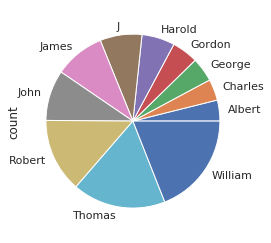

In [11]:
piedata = babynames[(babynames["year"] == 1917) & (babynames["sex"] == 'M') & (babynames["count"] > 500)]
piedata.sort_values("count").plot(y="count", kind="pie", labels=piedata["name"], legend=False)

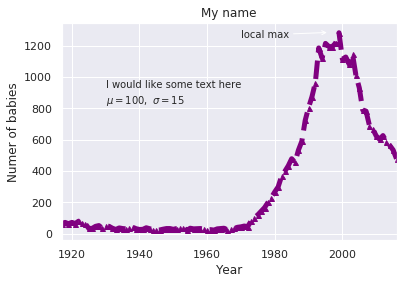

In [12]:
yourname.plot(
    "year",
    "count",
    legend=False,
    color="purple",
    grid=True,
    title="My name",
    marker='^',
    markersize=5,
    linewidth=5,
    linestyle='--')
plt.xlabel("Year")
plt.ylabel("Numer of babies")
plt.text(1930, 930, 'I would like some text here')
plt.text(1930, 830, '$\\mu=100,\\ \\sigma=15$') # LaTeX is allowed
plt.annotate('local max', xy=(1996, 1285), xytext=(1970, 1250), arrowprops=dict(arrowstyle='->'))
pass

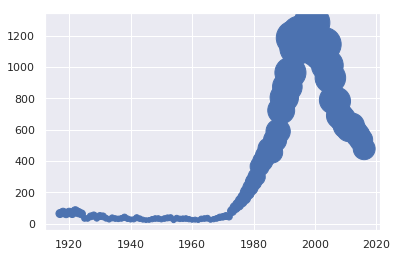

In [13]:
plt.scatter("year", "count", s="count", data=yourname)